### Linear Regression

#### Part 1:
(a) Read the training and test csv datasets

In [1]:
from numpy import genfromtxt
import numpy as np
X_Train = genfromtxt('X_train.csv', delimiter=',')
Y_Train = genfromtxt('Y_train.csv', delimiter=',')
X_Test = genfromtxt('X_test.csv', delimiter=',')
Y_Test = genfromtxt('Y_test.csv', delimiter=',')

Function to compute w<sub>RR</sub> and degrees of freedom

In [2]:
import numpy as np
from numpy.linalg import inv
def compute_w_df(X_Tr,alpha):
    wrr = np.array([]).reshape(0,X_Tr.shape[1])
    df=[]
    prod1=np.dot(X_Tr.T,X_Tr)
    prod3=np.dot(X_Tr.T,Y_Train)
    U, s, V = np.linalg.svd(X_Tr, full_matrices=True)
    S = np.diag(s)
    S_2=S*S
    for lamda in range(0,alpha):
        prod2=lamda*np.identity(X_Tr.shape[1])
        sum1=np.add(prod2,prod1)
        inv1=inv(sum1)
        prod4=np.dot(inv1,prod3)
        wrr = np.append(wrr,[prod4],axis=0)
        d1=(S_2/(lamda+S_2))
        d2=np.sum(d1)
        df.append(d2)
    df=np.array(df)
    return df,wrr  

Calling the function for λ = 0, 1, 2, 3, . . . , 5000

In [3]:
(df1,wrr1)=compute_w_df(X_Train,5001)

/Users/kaavyachinniah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


Plot the 7 values in w<sub>RR</sub> as a function of df(λ)

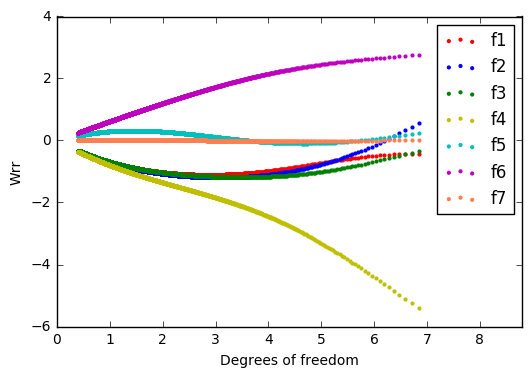

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.figure(figsize=(5001,7))
# for i in range(0,7):
plt.scatter(df1,wrr1[:,0],label="f1",marker='o',color='r',s = 4)
plt.scatter(df1,wrr1[:,1],label="f2",marker='o',color='b',s = 4)
plt.scatter(df1,wrr1[:,2],label="f3",marker='o',color='g',s = 4)
plt.scatter(df1,wrr1[:,3],label="f4",marker='o',color='y',s = 4)
plt.scatter(df1,wrr1[:,4],label="f5",marker='o',color='c',s = 4)
plt.scatter(df1,wrr1[:,5],label="f6",marker='o',color='m',s = 4)
plt.scatter(df1,wrr1[:,6],label="f7",marker='o',color='coral',s = 4)
# y label
plt.ylabel('Wrr')
# x label
plt.xlabel('Degrees of freedom')
# set the figure boundaries
plt.xlim([0, 8.8])
# and a legend
plt.legend(loc='upper right')

plt.show()

(b) The 4th dimension (car weight) and 6th dimension (car year) clearly stand out over the other dimensions because they get penalized the most after introducing lambda parameter in ridge regression and affect the regression output the most in least squares

(c) Function to calculate root mean squared error (RMSE)2

In [5]:
def rmse(a,X_Te,wrr1):
    rmse = []
    for i in range(0,a):
        y=np.dot(X_Te,wrr1[i])
        val=(Y_Test-y)*(Y_Test-y)
        val2=np.sqrt(sum(val)/42.0)
        rmse.append(val2)
    rmse=np.array(rmse)
    lam=np.arange(a)
    return rmse,lam

Plot the root mean squared error (RMSE)2 on the test set as a function of λ for λ = 0, . . . , 50

In [9]:
l1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

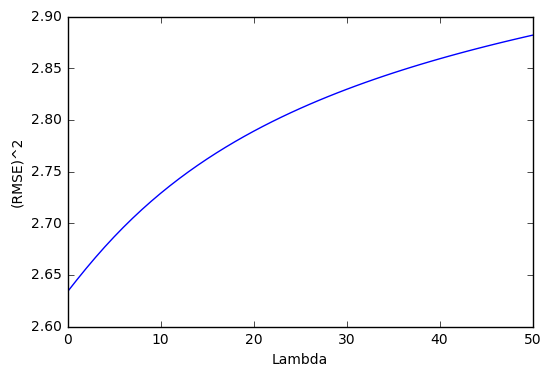

In [6]:
r1,l1=rmse(51,X_Test,wrr1)
plt.plot(l1,r1)
# y label
plt.ylabel('(RMSE)^2')
# x label
plt.xlabel('Lambda')
plt.show()

For chosing the value λ :  
Case λ → 0 : w<sub>RR</sub> → w<sub>LS</sub>  
Case λ → ∞ : w<sub>RR</sub> → 0

#### Part 2:

A function to compute the input data set for p=2

In [317]:
def poly2(Xmat):
    X_tr=Xmat
    np.shape(X_tr)
    for i in range(0,6):
        pr=np.square(X_tr[:,i])
        X_tr=np.column_stack([X_tr,pr])
    return X_tr

A function to compute the input data set for p=3

In [318]:
def poly3(Xmat):
    X_tr=Xmat
    np.shape(X_tr)
    for i in range(0,6):
        pr=np.power(X_tr[:,i],3)
        X_tr=np.column_stack([X_tr,pr])
    return X_tr

Computing input training and test dataset for p=2,3

In [319]:
X_tr2=poly2(X_Train)
X_te2=poly2(X_Test)
X_tr3=poly3(X_tr2)
X_te3=poly3(X_te2)

Plot the test RMSE as a function of λ = 0, . . . , 500 for p = 1, 2, 3

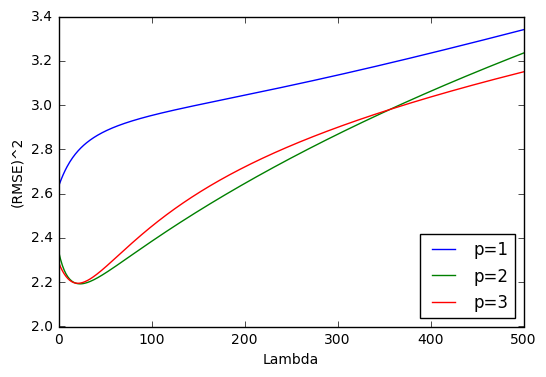

In [320]:
(df1,wrr1)=compute_w_df(X_Train,501)
r1,l1=rmse(501,X_Test,wrr1)

(df2,wrr2)=compute_w_df(X_tr2,501)
r2,l2=rmse(501,X_te2,wrr2)

(df3,wrr3)=compute_w_df(X_tr3,501)
r3,l3=rmse(501,X_te3,wrr3)

plt.plot(l1,r1,label="p=1")
plt.plot(l2,r2,label="p=2")
plt.plot(l3,r3,label="p=3")
plt.legend(loc='lower right')
# y label
plt.ylabel('(RMSE)^2')
# x label
plt.xlabel('Lambda')
plt.show()

Here, we chose the curve with least RMSE value. The RMSE value is the least for p=2<sup>nd</sup> order polynomial regression. 
The ideal value of λ is chosen based on what gives the lowest RMSE value. 